In [1]:
import matplotlib.pyplot as plt
import numpy 
import pandas 
import seaborn 
import peakutils
import wfdb
import pywt

In [2]:
import scipy.signal as signal

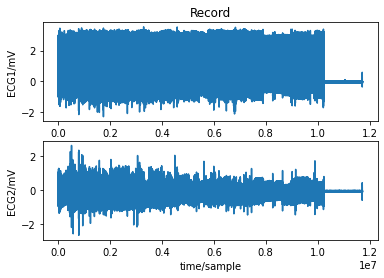

In [3]:
# load sample
ECG_record = wfdb.rdrecord('/Users/oobiri/Documents/Carleton/AFDetect/data/mbnsr/16265')
wfdb.plot_wfdb(record=ECG_record, title='Record')

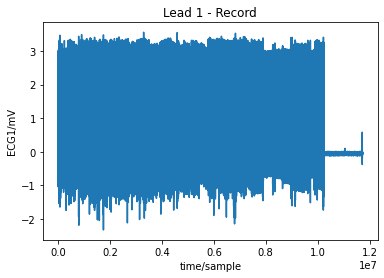

In [3]:
# Load ECG lead 1
ECG_recordLead1 = wfdb.rdrecord('/Users/oobiri/Documents/Carleton/AFDetect/data/mbnsr/16265', channels=[0])
wfdb.plot_wfdb(record=ECG_recordLead1, title='Lead 1 - Record')

In [8]:
ECG_recordLead1.__dict__

{'record_name': '16265',
 'n_sig': 1,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1'],
 'p_signal': array([[-0.165],
        [-0.155],
        [-0.195],
        ...,
        [-0.05 ],
        [-0.05 ],
        [-0.05 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat'],
 'fmt': ['212'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-33],
 'checksum': [15756],
 'block_size': [0]}

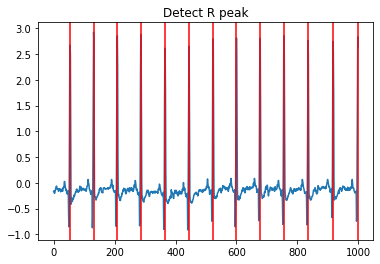

In [4]:
# R Peak
signalSlice = numpy.ndarray.flatten(ECG_recordLead1.p_signal[0:1000])

peakIndex = peakutils.indexes(signalSlice, thres=0.3, min_dist = 50)

fig, ax = plt.subplots()

ax.set_title('Detect R peak')
ax.plot(signalSlice)

for peak in peakIndex:
    ax.axvline(x = peak, color='r')

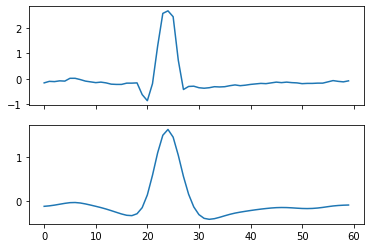

In [5]:
# Smoothening 

regSignal = numpy.ndarray.flatten(ECG_recordLead1.p_signal[30:90])

plot, av = plt.subplots(2, sharex=True)

smoothedSignal = signal.cspline1d(regSignal, lamb=10)

av[0].plot(regSignal)
av[1].plot(smoothedSignal)

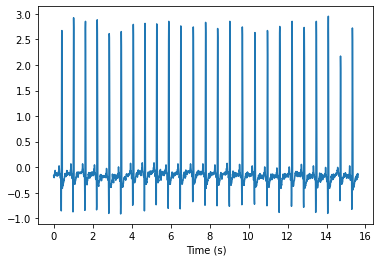

In [7]:
data = ECG_recordLead1.p_signal
numSamps = 2000

times = numpy.arange(numSamps, dtype = 'float') / ECG_recordLead1.fs

plt.plot(times, data[: numSamps])
plt.xlabel('Time (s)')
plt.show()

In [1]:
import pandas_profiling

In [ ]:
mbnsr_dataset = 